Дата начала 
 15/01
Дата окончания 
 28/01

Список метрик: 
1) GMV главная
2) GMV тотал 
3) Конверсия просмотр-заказ 

In [236]:
import prophet
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [237]:
def prepare_data(csv_filename, y_val_name, ds_val_name):
    d = pd.read_csv(csv_filename)
    d = d[d[y_val_name] != 0]
    d[ds_val_name] = pd.to_datetime(d[ds_val_name], #dayfirst = True
                                   )
    d = d.rename(columns={y_val_name: "y", ds_val_name: "ds"})
    d = d[["ds", "y"]]
    return d

In [238]:
d = prepare_data("data_for_metric_1.csv", "y", "ds")
d.head()

,ds,y
0,2021-03-09,0.000014
1,2021-03-10,0.285872
2,2021-03-11,0.551110
3,2021-03-12,0.592738
4,2021-03-13,0.504247


In [239]:
def set_holidays():
    # Setting holidays 

    black_fridays = pd.DataFrame({
      'holiday': 'black_friday',
      'ds': pd.to_datetime(['2022-11-26', '2022-11-25', '2023-11-24',]),
      'lower_window': -14,
      'upper_window': 14,
    })
    new_years = pd.DataFrame({
      'holiday': 'new_year',
      'ds': pd.to_datetime(['2021-12-31', '2022-12-31', '2023-12-31']),
      'lower_window': -2,
      'upper_window': 7,
    })
    febs_23 = pd.DataFrame({
      'holiday': '23_feb',
      'ds': pd.to_datetime(['2021-02-23', '2022-02-23', '2023-02-23']),
      'lower_window': -4,
      'upper_window': 3,
    })
    
    mays_1 = pd.DataFrame({
      'holiday': '1_may',
      'ds': pd.to_datetime(['2021-05-01', '2022-05-01', '2023-05-01']),
      'lower_window': -2,
      'upper_window': 2,
    })
    
    
    holidays = pd.concat((black_fridays, new_years, febs_23, mays_1))
    return holidays
        
holidays = set_holidays()        

In [240]:
# Setting Baseline Prophet model
model = Prophet(
    yearly_seasonality=7, 
    #seasonality_mode = "multiplicative",

            
            weekly_seasonality=10, 
            holidays=holidays, 
            growth = "linear", 
            holidays_prior_scale = 10,
            n_changepoints = 20,
           )
model.fit(d)

21:25:42 - cmdstanpy - INFO - Chain [1] start processing
21:25:42 - cmdstanpy - INFO - Chain [1] done processing


In [241]:
# Creating Future Dataset for Forecasting 
future = model.make_future_dataframe(periods=50)
future.tail()

,ds
1057,2024-02-28
1058,2024-02-29
1059,2024-03-01
1060,2024-03-02
1061,2024-03-03


In [242]:
forecast = model.predict(future)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


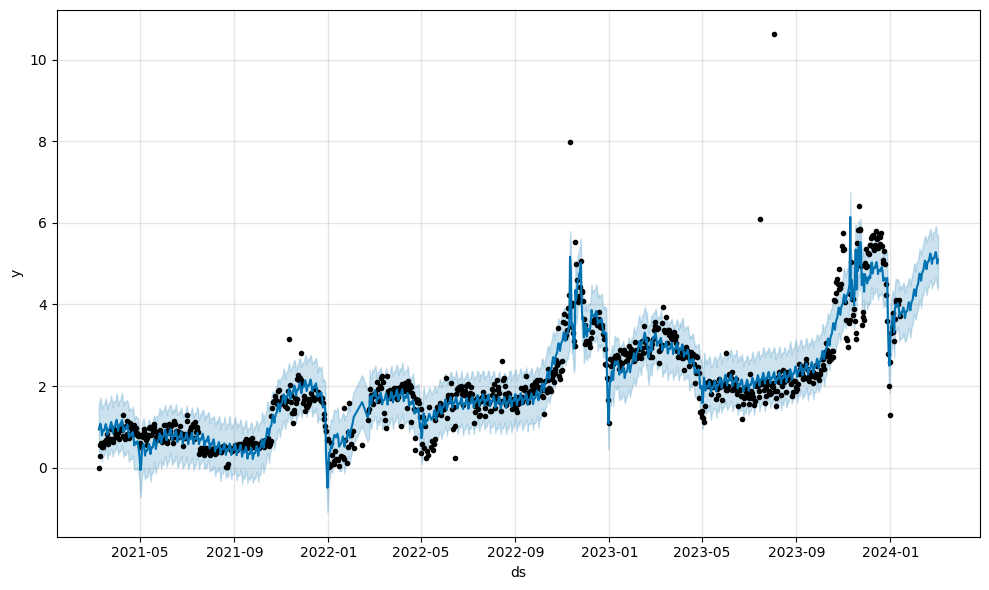

In [243]:
predict_plot = model.plot(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

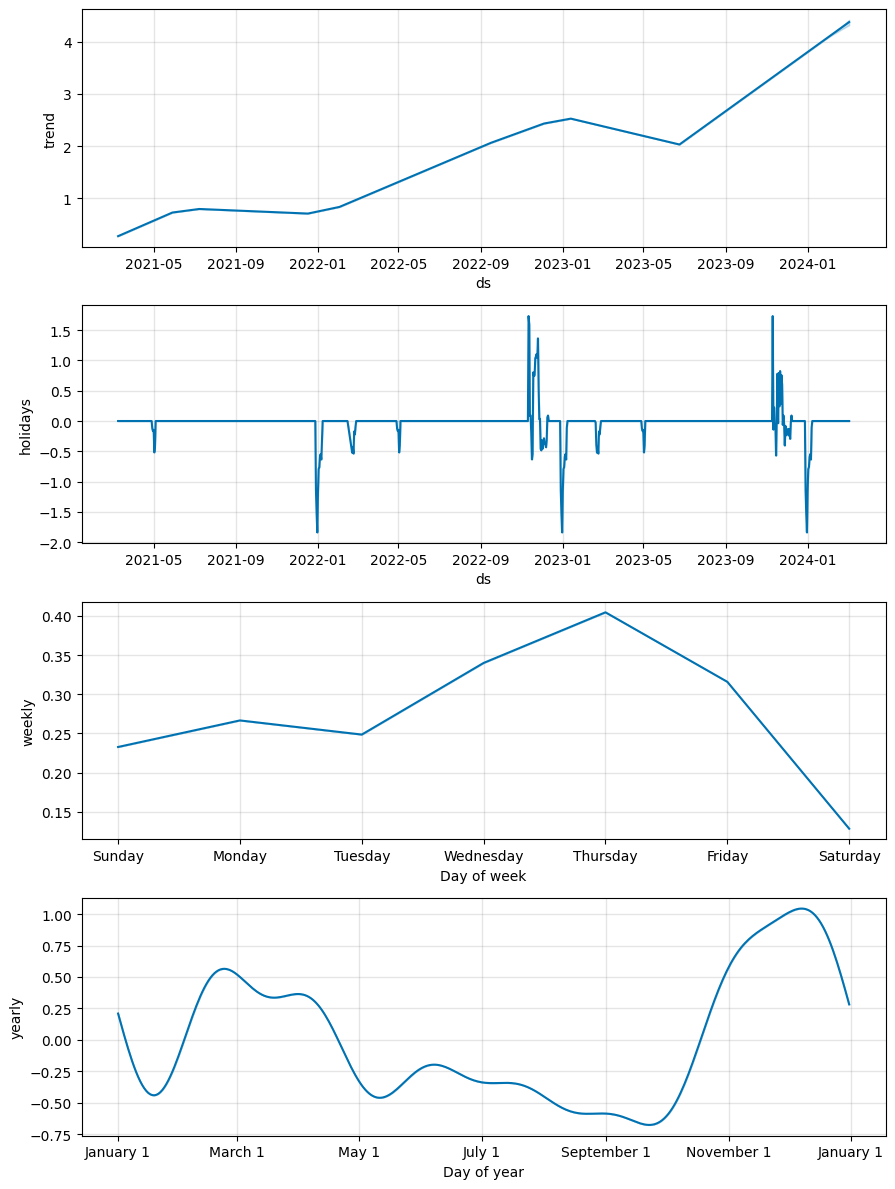

In [244]:
components_plot = model.plot_components(forecast)

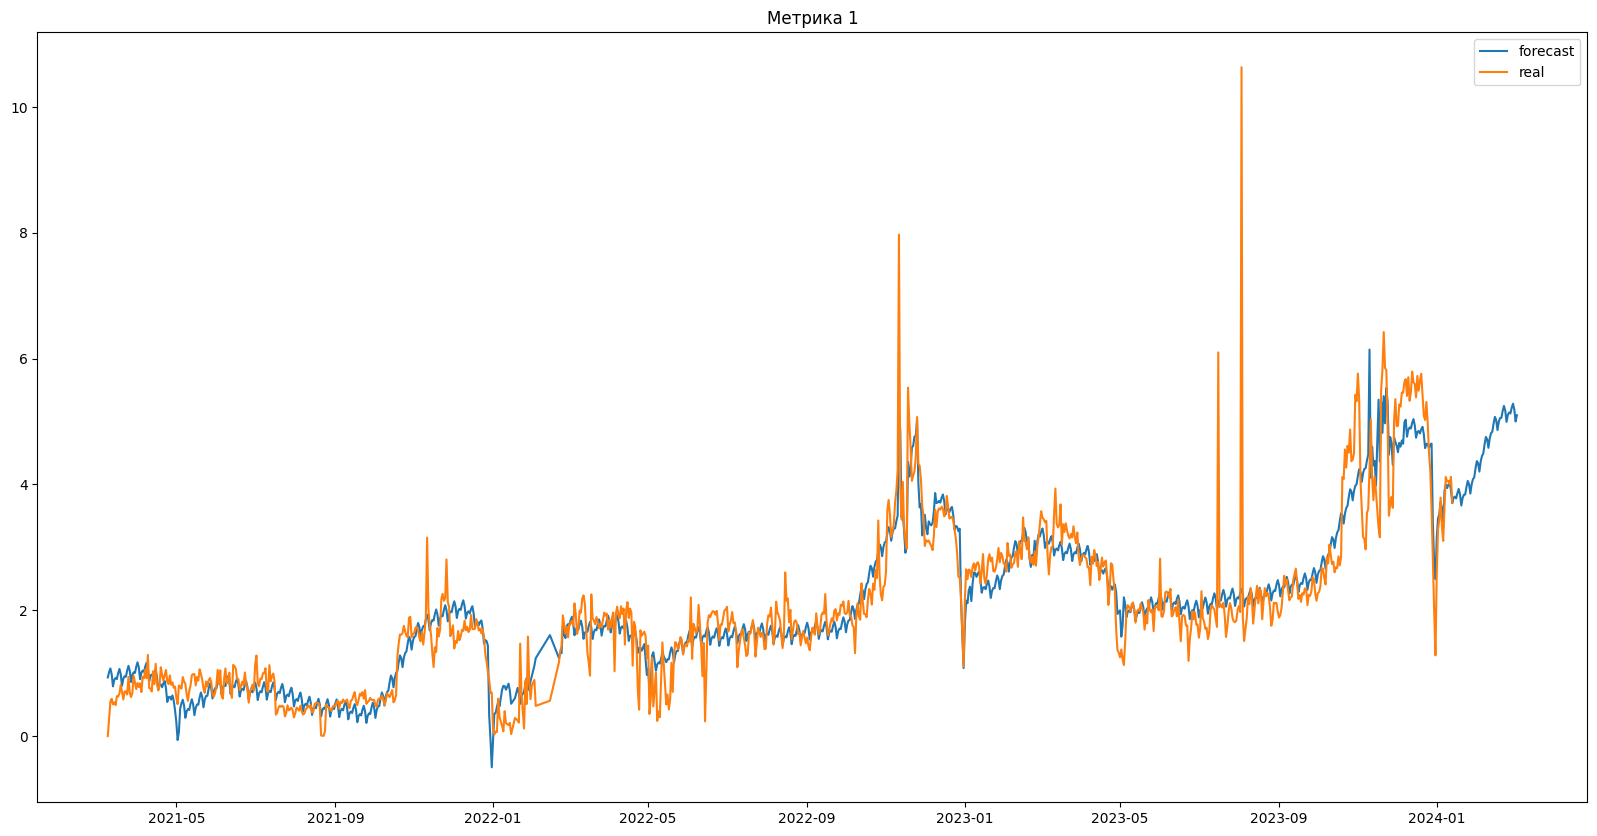

In [245]:
df = pd.merge(d, forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]], how = "right", on = "ds")

plt.figure()
plt.plot(df.ds, df.yhat, label = "forecast", ls = "-")
plt.plot(df.ds, df.y, label = "real")
plt.title("Метрика 1")
plt.legend()
plt.show()

In [246]:
actual_test = pd.read_csv("metric_1_actual_test.csv")
actual_test["ds"] = pd.to_datetime(actual_test["ds"], dayfirst=True)
actual_test

/var/folders/23/sf6t2ln1289d0spv6qp4gvbw0000gn/T/ipykernel_42245/121045826.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  actual_test["ds"] = pd.to_datetime(actual_test["ds"], dayfirst=True)


,ds,y
0,2024-01-14,3.958643
1,2024-01-15,3.983406
2,2024-01-16,4.235197
3,2024-01-17,4.213478
4,2024-01-18,4.000290
5,2024-01-19,4.681669
6,2024-01-20,3.908274
7,2024-01-21,4.004074
8,2024-01-22,4.374735
9,2024-01-23,4.598858


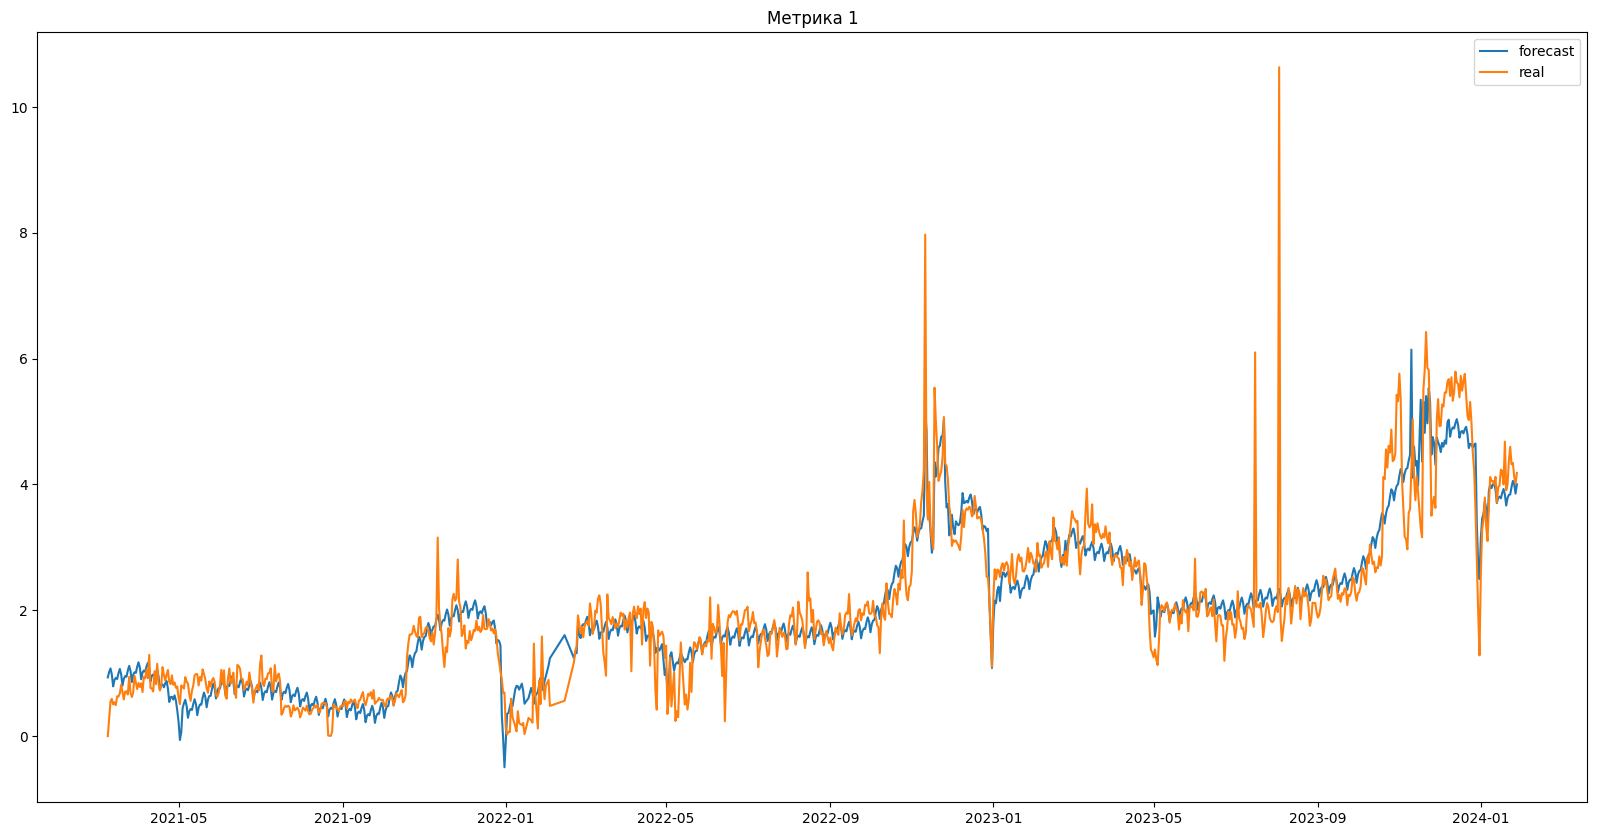

In [247]:
train = df[df["ds"] <= "2024-01-13"]
test = df[(df["ds"] > "2024-01-13") & (df["ds"] <= "2024-01-28")]

actual_test = actual_test[(actual_test.ds > "2024-01-13") & (actual_test.ds < "2024-03-03")]
test_d = pd.merge(test, actual_test, how = "inner", on = "ds")
test_d.rename(columns = {"y_y": "y"}, inplace = True)
del test_d["y_x"]
new_d = pd.concat([train, test_d])

plt.figure()
plt.plot(new_d.ds, new_d.yhat, label = "forecast", ls = "-")
plt.plot(new_d.ds, new_d.y, label = "real")
plt.title("Метрика 1")
plt.legend()
plt.show()

In [248]:
plot_only_test = new_d.tail(50)

In [249]:
plot_only_test["y_hat_1"] = 1 * (plot_only_test["ds"] >= "2024-01-15")
plot_only_test["y_hat_1"] = plot_only_test["y_hat_1"] * plot_only_test["yhat"]
#plot_only_test.replace()

/var/folders/23/sf6t2ln1289d0spv6qp4gvbw0000gn/T/ipykernel_42245/3875187870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_only_test["y_hat_1"] = 1 * (plot_only_test["ds"] >= "2024-01-15")
/var/folders/23/sf6t2ln1289d0spv6qp4gvbw0000gn/T/ipykernel_42245/3875187870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_only_test["y_hat_1"] = plot_only_test["y_hat_1"] * plot_only_test["yhat"]


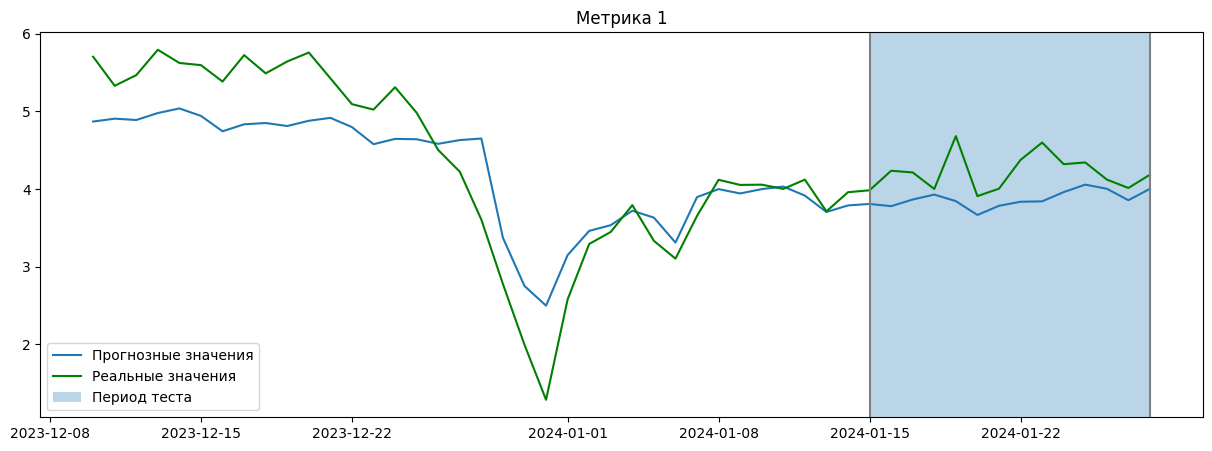

In [250]:
plt.rcParams["figure.figsize"] = (15,5)
import datetime as dt


plt.figure()
plt.plot(plot_only_test["ds"], plot_only_test["yhat"], label = "Прогнозные значения", ls = "-")
#plt.plot(plot_only_test[plot_only_test["ds"] >= "2024-01-15"]["ds"], plot_only_test[plot_only_test["ds"] >= "2024-01-15"]["yhat"], label = "Прогнозные значения", ls = "-")
plt.plot(plot_only_test.ds, plot_only_test.y, label = "Реальные значения", color = "green")
plt.axvline(dt.datetime(2024, 1, 15),  color = "grey")
plt.axvline(dt.datetime(2024, 1, 28),  color = "grey")
plt.axvspan(dt.datetime(2024, 1, 15), dt.datetime(2024, 1, 28), alpha = 0.3, label = "Период теста")
plt.title("Метрика 1")
plt.legend()
plt.savefig("test_1.png")
plt.show()

In [251]:
prcnt_cnhg = (plot_only_test.mean()["yhat"] - plot_only_test.mean()["y"])/plot_only_test.mean()["y"]
prcnt_cnhg

-0.045521245303246194

In [232]:
test_test = plot_only_test[(plot_only_test["ds"] >= "2024-01-15") & (plot_only_test["ds"] <= "2024-01-28")]
test_test.mean()

ds            2024-01-21 12:00:00
y                        4.212891
yhat                     3.873142
yhat_lower               3.245606
yhat_upper               4.498224
y_hat_1                  3.873142
dtype: object